**ABSA CASE STUDY ON RETAIL TRADE SALES DATA FROM STATS-SA**

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import The Original Data


In [2]:
data = pd.read_excel('Retail trade sales from 2002.xlsx')

data.head()

,H01,H02,H03,H04,H05,H15,H16,H17,H25,MO012002,...,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023
0,P6242_1,Retail trade sales,con_S621C,Type of dealer,General dealers,At constant prices,Actual values,R million,Monthly,NaN,...,46361,53053,36984,40322,41730,37718,40189,40770,36968,40378
1,P6242_1,Retail trade sales,con_S6220,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Actual values,R million,Monthly,NaN,...,7540,10551,6852,7067,7433,7238,6793,7069,7321,7033
2,P6242_1,Retail trade sales,con_S6231,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Actual values,R million,Monthly,NaN,...,6832,7548,7199,6459,6965,7350,6814,6589,7236,7336
3,P6242_1,Retail trade sales,con_S6232,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Actual values,R million,Monthly,NaN,...,20752,29614,16130,15149,15716,16359,18157,15825,16974,15570
4,P6242_1,Retail trade sales,con_S6233,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Actual values,R million,Monthly,NaN,...,5840,5838,3908,3981,4338,3916,3956,4101,4251,4111


**Data exploration**

Deleting unwanted Columns

In [3]:
columns_to_delete = ['H01','H02','H03','H17','H25']
Data_v2=data.drop(columns=columns_to_delete)
Data_v2.head()

,H04,H05,H15,H16,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,...,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023
0,Type of dealer,General dealers,At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,46361,53053,36984,40322,41730,37718,40189,40770,36968,40378
1,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,7540,10551,6852,7067,7433,7238,6793,7069,7321,7033
2,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,6832,7548,7199,6459,6965,7350,6814,6589,7236,7336
3,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,20752,29614,16130,15149,15716,16359,18157,15825,16974,15570
4,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,5840,5838,3908,3981,4338,3916,3956,4101,4251,4111


Remaning Columns

In [4]:
# Columns to rename (old column name as key, new column name as value)
columns_to_rename = {'H05':'Type-Of-Dealer','H15':'Price-Type','H16':'Price-Adjustment-Type'}

# Rename specific columns
Data_v2.rename(columns=columns_to_rename, inplace=True)
Data_v2.head()

,H04,Type-Of-Dealer,Price-Type,Price-Adjustment-Type,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,...,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023
0,Type of dealer,General dealers,At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,46361,53053,36984,40322,41730,37718,40189,40770,36968,40378
1,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,7540,10551,6852,7067,7433,7238,6793,7069,7321,7033
2,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,6832,7548,7199,6459,6965,7350,6814,6589,7236,7336
3,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,20752,29614,16130,15149,15716,16359,18157,15825,16974,15570
4,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,5840,5838,3908,3981,4338,3916,3956,4101,4251,4111


Arranging the Data in a Chronogical Order

In [5]:
# desired row order
desired_rows = ['0', '1', '2', '3', '4','5', '6', '7', '11', '12','13', '14', '15', '16', '17','8','18', '19', '20', '21', '22','23', '24', '9', '25', '26','27', '28', '29', '30', '31','10']  

# Creating a new DataFrame with rows rearranged
Data_v3 = Data_v2.iloc[desired_rows]


In [6]:
Data_v3.head()

,H04,Type-Of-Dealer,Price-Type,Price-Adjustment-Type,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,...,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023
0,Type of dealer,General dealers,At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,46361,53053,36984,40322,41730,37718,40189,40770,36968,40378
1,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,7540,10551,6852,7067,7433,7238,6793,7069,7321,7033
2,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,6832,7548,7199,6459,6965,7350,6814,6589,7236,7336
3,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,20752,29614,16130,15149,15716,16359,18157,15825,16974,15570
4,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,...,5840,5838,3908,3981,4338,3916,3956,4101,4251,4111


Filtering The Data

In [7]:
# Define multiple conditions for filtering
condition1 = (Data_v3['Price-Type'] == 'At constant prices')
condition2 = (Data_v3['Price-Adjustment-Type'] == 'Seasonally adjusted values')
condition3 = (Data_v3['H04'] != 'Total')


# Combine conditions using the & operator (AND)
filtered_Data = Data_v3[condition1 & condition2 & condition3]

In [8]:
filtered_Data.head()

,H04,Type-Of-Dealer,Price-Type,Price-Adjustment-Type,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,...,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023
25,Type of dealer,General dealers,At constant prices,Seasonally adjusted values,NaN,NaN,NaN,NaN,NaN,NaN,...,41711,41418,41599,41298,41182,41333,40733,40957,40897,40738
26,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Seasonally adjusted values,NaN,NaN,NaN,NaN,NaN,NaN,...,7446,7464,7501,7629,7468,7510,7262,7702,7486,7487
27,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Seasonally adjusted values,NaN,NaN,NaN,NaN,NaN,NaN,...,7045,6999,7100,7086,7061,7066,6978,6992,6966,7029
28,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Seasonally adjusted values,NaN,NaN,NaN,NaN,NaN,NaN,...,17266,16997,17536,17593,17780,17124,17855,17686,18151,18508
29,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Seasonally adjusted values,NaN,NaN,NaN,NaN,NaN,NaN,...,4576,4321,4361,4411,4359,4328,4281,4362,4416,4346


Select Columns to be used(Important fields were seen to be from 2008-2023 as Prior 2008 we have missing data)

In [9]:
selected_columns = pd.concat([filtered_Data.loc[:, 'H04':'Price-Adjustment-Type'], filtered_Data.loc[:, 'MO012008':'MO082023']], axis=1)


In [10]:
selected_columns.head()

,H04,Type-Of-Dealer,Price-Type,Price-Adjustment-Type,MO012008,MO022008,MO032008,MO042008,MO052008,MO062008,...,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023
25,Type of dealer,General dealers,At constant prices,Seasonally adjusted values,30853,31699,31903,31924,31972,31925,...,41711,41418,41599,41298,41182,41333,40733,40957,40897,40738
26,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Seasonally adjusted values,6400,6947,6712,6862,6817,6723,...,7446,7464,7501,7629,7468,7510,7262,7702,7486,7487
27,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Seasonally adjusted values,4322,4807,4369,4387,4440,4443,...,7045,6999,7100,7086,7061,7066,6978,6992,6966,7029
28,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Seasonally adjusted values,9235,9227,9271,9210,9377,9821,...,17266,16997,17536,17593,17780,17124,17855,17686,18151,18508
29,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Seasonally adjusted values,2843,2808,2892,2737,2738,2799,...,4576,4321,4361,4411,4359,4328,4281,4362,4416,4346


Melt the Data

In [11]:
df = pd.DataFrame(selected_columns)

# Unpivot/melt the DataFrame from wide to long format
melted_df = pd.melt(df, id_vars=['H04','Type-Of-Dealer','Price-Type','Price-Adjustment-Type'], var_name='Month', value_name='Amount')

In [12]:
melted_df.head()

,H04,Type-Of-Dealer,Price-Type,Price-Adjustment-Type,Month,Amount
0,Type of dealer,General dealers,At constant prices,Seasonally adjusted values,MO012008,30853
1,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Seasonally adjusted values,MO012008,6400
2,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Seasonally adjusted values,MO012008,4322
3,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Seasonally adjusted values,MO012008,9235
4,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Seasonally adjusted values,MO012008,2843


Add a new column to take out years

In [13]:
n = 4

# Extract the last n characters from 'Text' column and create a new column 'RightText'
melted_df['Year'] = melted_df['Month'].str[-n:]


In [14]:
melted_df.head()

,H04,Type-Of-Dealer,Price-Type,Price-Adjustment-Type,Month,Amount,Year
0,Type of dealer,General dealers,At constant prices,Seasonally adjusted values,MO012008,30853,2008
1,Type of dealer,"Retailers of food, beverages and tobacco in sp...",At constant prices,Seasonally adjusted values,MO012008,6400,2008
2,Type of dealer,"Retailers in pharmaceutical and medical goods,...",At constant prices,Seasonally adjusted values,MO012008,4322,2008
3,Type of dealer,"Retailers in textiles,clothing,footwear and le...",At constant prices,Seasonally adjusted values,MO012008,9235,2008
4,Type of dealer,"Retailers in household furniture,appliances an...",At constant prices,Seasonally adjusted values,MO012008,2843,2008


Plotting the visual as a line graph

C:\Users\Wits-User\AppData\Local\Temp\ipykernel_8592\2444351894.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_melted_df = melted_df.groupby(['Year', 'Type-Of-Dealer']).sum().reset_index()


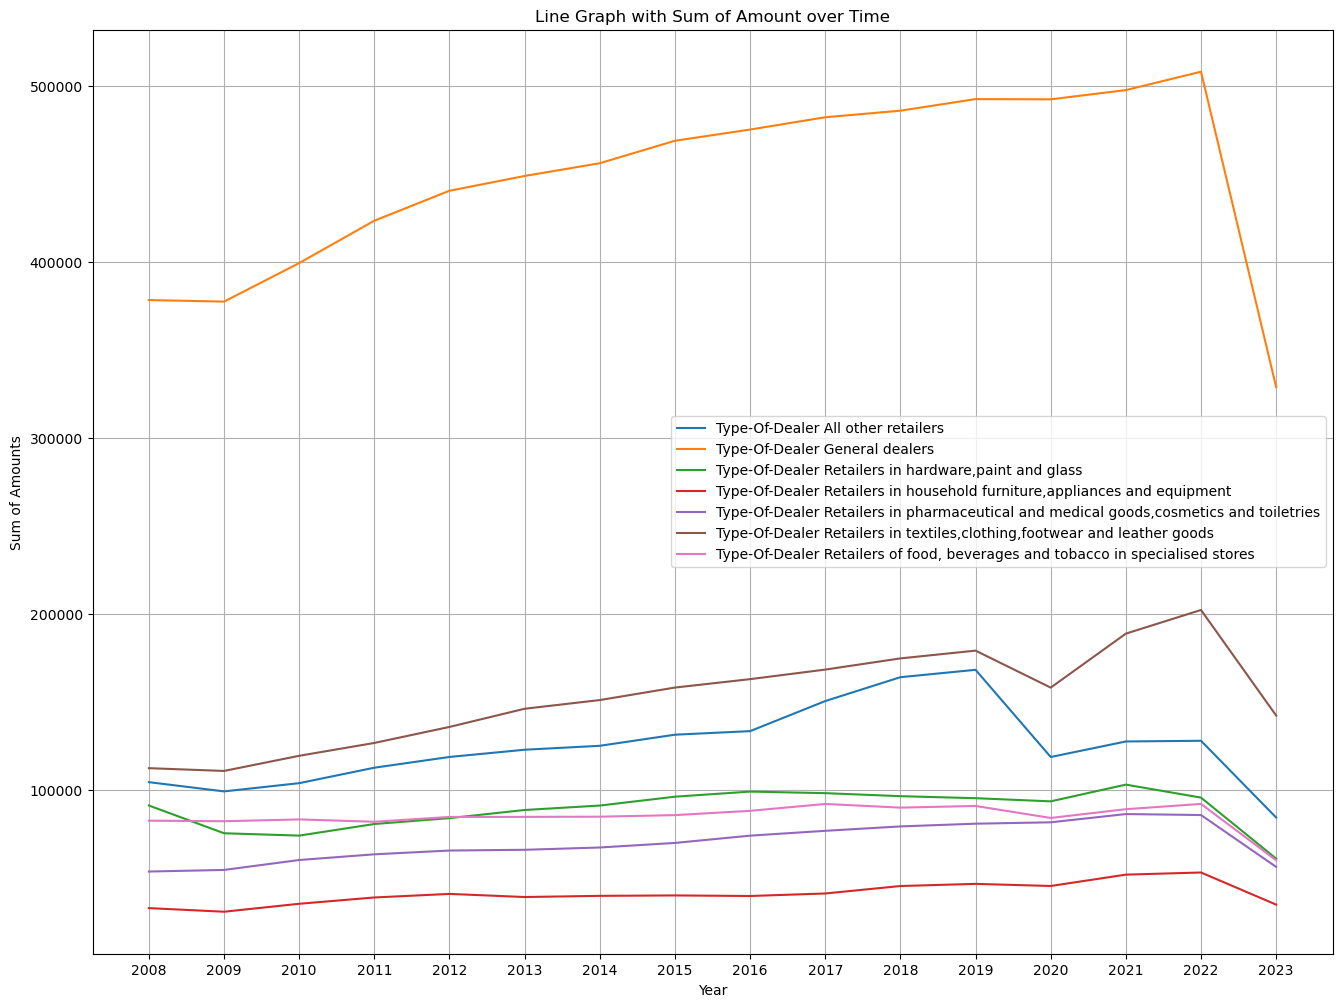

In [15]:
# Group by 'Time' and 'Category' and sum the 'Amount'
grouped_melted_df = melted_df.groupby(['Year', 'Type-Of-Dealer']).sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(16, 12))

# Loop through unique categories and plot lines
for category in grouped_melted_df['Type-Of-Dealer'].unique():
    subset = grouped_melted_df[grouped_melted_df['Type-Of-Dealer'] == category]
    plt.plot(subset['Year'], subset['Amount'], label=f'Type-Of-Dealer {category}')

plt.xlabel('Year')
plt.ylabel('Sum of Amounts')
plt.title('Line Graph with Sum of Amount over Time')
plt.legend()
plt.grid(True)
plt.show()